In [1]:
!pip install  pycaret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 17.2 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 69.6 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.5/160.5 kB 7.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 4.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.9/58.9 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 484.7/484.7 kB 16.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 61.8 MB/s eta 0:00:00:00:010:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.1/81.1 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 51.1 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 49.6 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.4/34.4 MB 38.6 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [2]:
from pycaret.datasets import get_data
from pycaret.classification import *
import pandas as pd
data = pd.read_excel("/kaggle/input/qb2024-2-18/.xlsx",sheet_name='训练集')
data.drop(columns=['编号'], inplace=True)
data2 = pd.read_excel("/kaggle/input/qb2024-2-18/.xlsx",sheet_name='测试集')
data2.drop(columns=['编号'], inplace=True)


# 如果是全部特征
data.drop(columns=['Age'], inplace=True)
data.drop(columns=['BUN'], inplace=True)
data.drop(columns=['CURB65'], inplace=True)
data.drop(columns=['TP'], inplace=True)

data2.drop(columns=['Age'], inplace=True)
data2.drop(columns=['BUN'], inplace=True)
data2.drop(columns=['CURB65'], inplace=True)
data2.drop(columns=['TP'], inplace=True)

data3 = pd.concat([data, data2], axis=0).reset_index(drop=True)



data3

,target,Lymphocyte,Albumin,log_glcm_MaximumProbability,log-3D_glrlm_RunLengthNonUniformityNormalized,log-3D_firstorder_Entropy,log-3D_glcm_Id,log-3D_glszm_ZonePercentage,log-3D_firstorder_10Percentile,original_firstorder_Entropy,original_glcm_Contrast,original_glcm_Imc1,original_glcm_Imc2,original_glcm_JointEnergy,original_glszm_LargeAreaLowGrayLevelEmphasis,original_shape_LeastAxisLength,original_shape_MajorAxisLength,original_shape_Maximum2DDiameterColumn
0,0,12.60,32.5,-0.704947,0.879467,-0.936085,0.325057,0.074001,-0.232792,0.420313,1.003225,0.373202,-0.299315,-0.408447,-0.090322,-0.189676,1.393978,0.751612
1,0,0.50,33.4,1.524320,-1.659591,-1.254441,2.076787,-1.118386,0.617560,-0.042386,-0.958945,0.072097,0.262759,-0.080922,-0.080458,0.131122,-0.317276,0.565193
2,0,1.31,46.1,0.067440,0.054602,0.922559,-0.546110,0.456618,-0.455927,0.624808,0.306232,0.025952,0.507243,-0.346679,-0.089981,-0.866867,1.877085,0.678922
3,0,4.13,27.6,-0.433933,0.227635,-0.128500,0.198842,-0.374070,0.444471,-0.321890,0.327892,0.527854,-0.943339,-0.069447,-0.086475,0.963736,0.062966,0.499397
4,0,0.59,34.0,-0.837453,0.443650,-0.286034,0.163295,-0.746481,0.370874,0.686665,0.690070,0.583553,-1.101635,-0.518835,-0.090859,-0.142428,-0.828761,-0.777050
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169,1,15.17,28.7,-0.949208,0.747214,0.314113,-0.373791,-0.476537,0.207404,0.738245,0.551380,0.550384,-0.867180,-0.501151,-0.090757,1.631956,1.153633,1.086051
170,1,1.54,35.8,-0.639225,0.352332,-0.260448,0.116058,-0.395494,0.178384,0.078703,0.088312,0.647561,-1.353800,-0.352460,-0.090652,0.829015,-0.300989,0.553308
171,1,0.30,35.0,0.918962,-0.954076,0.427230,0.038632,-0.162977,-0.175264,0.147123,-0.822079,-0.312104,0.962011,0.094387,-0.069601,1.559272,1.197742,0.602225
172,1,0.70,34.4,-0.553161,0.163044,0.215225,0.006640,-0.450468,0.791848,0.047085,-0.103921,0.532387,-1.017453,-0.327878,-0.089896,1.500159,0.882914,0.927420


In [27]:
import numpy as np
import pandas as pd
import statsmodels.api as sm



for column_name, column_data in data2.iteritems():
    # Add a constant to the independent variable
    if column_name == 'target':
        continue
    X = sm.add_constant(data2[column_name])

    # Fit logistic regression model
    logit_model = sm.Logit(data2['target'], X)
    result = logit_model.fit()

    # Print summary of the logistic regression model
    # print(result.summary())
    print(result.pvalues)
    print("\n")


Optimization terminated successfully.
         Current function value: 0.557932
         Iterations 6
const    0.00475
Age      0.00798
dtype: float64


Optimization terminated successfully.
         Current function value: 0.642707
         Iterations 5
const    0.061351
BUN      0.235699
dtype: float64


Optimization terminated successfully.
         Current function value: 0.503740
         Iterations 6
const     0.000836
CURB65    0.001187
dtype: float64


Optimization terminated successfully.
         Current function value: 0.656327
         Iterations 4
const         0.111713
Lymphocyte    0.908163
dtype: float64


Optimization terminated successfully.
         Current function value: 0.618568
         Iterations 5
const    0.112594
TP       0.059112
dtype: float64


Optimization terminated successfully.
         Current function value: 0.554438
         Iterations 6
const      0.015240
Albumin    0.006924
dtype: float64


Optimization terminated successfully.
         Current f

In [53]:
import pandas as pd
import statsmodels.api as sm

# 假设 df 是你的 DataFrame，其中包含多个自变量（因素）和一个二分类因变量
# 这里只是一个示例，你需要将自变量和因变量替换为你的实际数据


# 添加常数项
X = data.drop(columns=['target'])
X =data[['Age','BUN','CURB65','Lymphocyte','TP','Albumin']]
# 创建逻辑回归模型
logit_model = sm.Logit(data['target'], X)

# 拟合模型
result = logit_model.fit()

# 打印模型摘要
print(result.summary())


Optimization terminated successfully.
         Current function value: 0.556629
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                 target   No. Observations:                  122
Model:                          Logit   Df Residuals:                      116
Method:                           MLE   Df Model:                            5
Date:                Sun, 18 Feb 2024   Pseudo R-squ.:                  0.1545
Time:                        09:11:36   Log-Likelihood:                -67.909
converged:                       True   LL-Null:                       -80.318
Covariance Type:            nonrobust   LLR p-value:                 0.0001511
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Age            0.0083      0.013      0.637      0.524      -0.017       0.034
BUN            0.0198      0.

In [4]:


df3 = data3[['target','Age', 'Sex', 'CURB-65', 'Smoke', 'drink']].copy()
df4 = data3[['target','BUN尿素1.7-8.3', '1白细胞计数', '2中性粒细胞', '3淋巴细胞', '4红细胞沉降率']].copy()
df5 = data3[['target','5总蛋白（60-75）', '6白蛋白（40-55）', '7肌酐（44-135）45-84', '8丙酮酸转氨酶（8-40）', '9天门冬氨酸氨基转移酶（5-40）','11D-二聚体（＜200）']].copy()
sns.pairplot(df5, hue="target", corner=True)
plt.show()

KeyError: "['Age', 'Sex', 'CURB-65', 'Smoke', 'drink'] not in index"

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "/opt/conda/lib/python3.10/site-packages/PIL/ImageFile.py", line 515, in _save
    fh = fp.fileno()
AttributeError: '_idat' object has no attribute 'fileno'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/opt/conda/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/tmp/ipykernel_33/4122953368.py", line 15, in <module>
    plt.savefig(r'hotmap.png',dpi=600, bbox_inches='tight')
  File "/opt/conda/lib/python3.10/site-packages/matplotlib/pyplot.py", line 1023, in savefig
    *label* attribute has been exposed for this purpose: if you want
  File "/opt/conda/lib/python3.10/site-packages/matplotlib/figure.py", line 3378, in savefig
    event = None
  File "/opt/conda/lib/python3.10/site-packages/matplotlib/backend_bases.py", line 2366, in print_figure
    """
  File "/opt/conda/lib/pytho

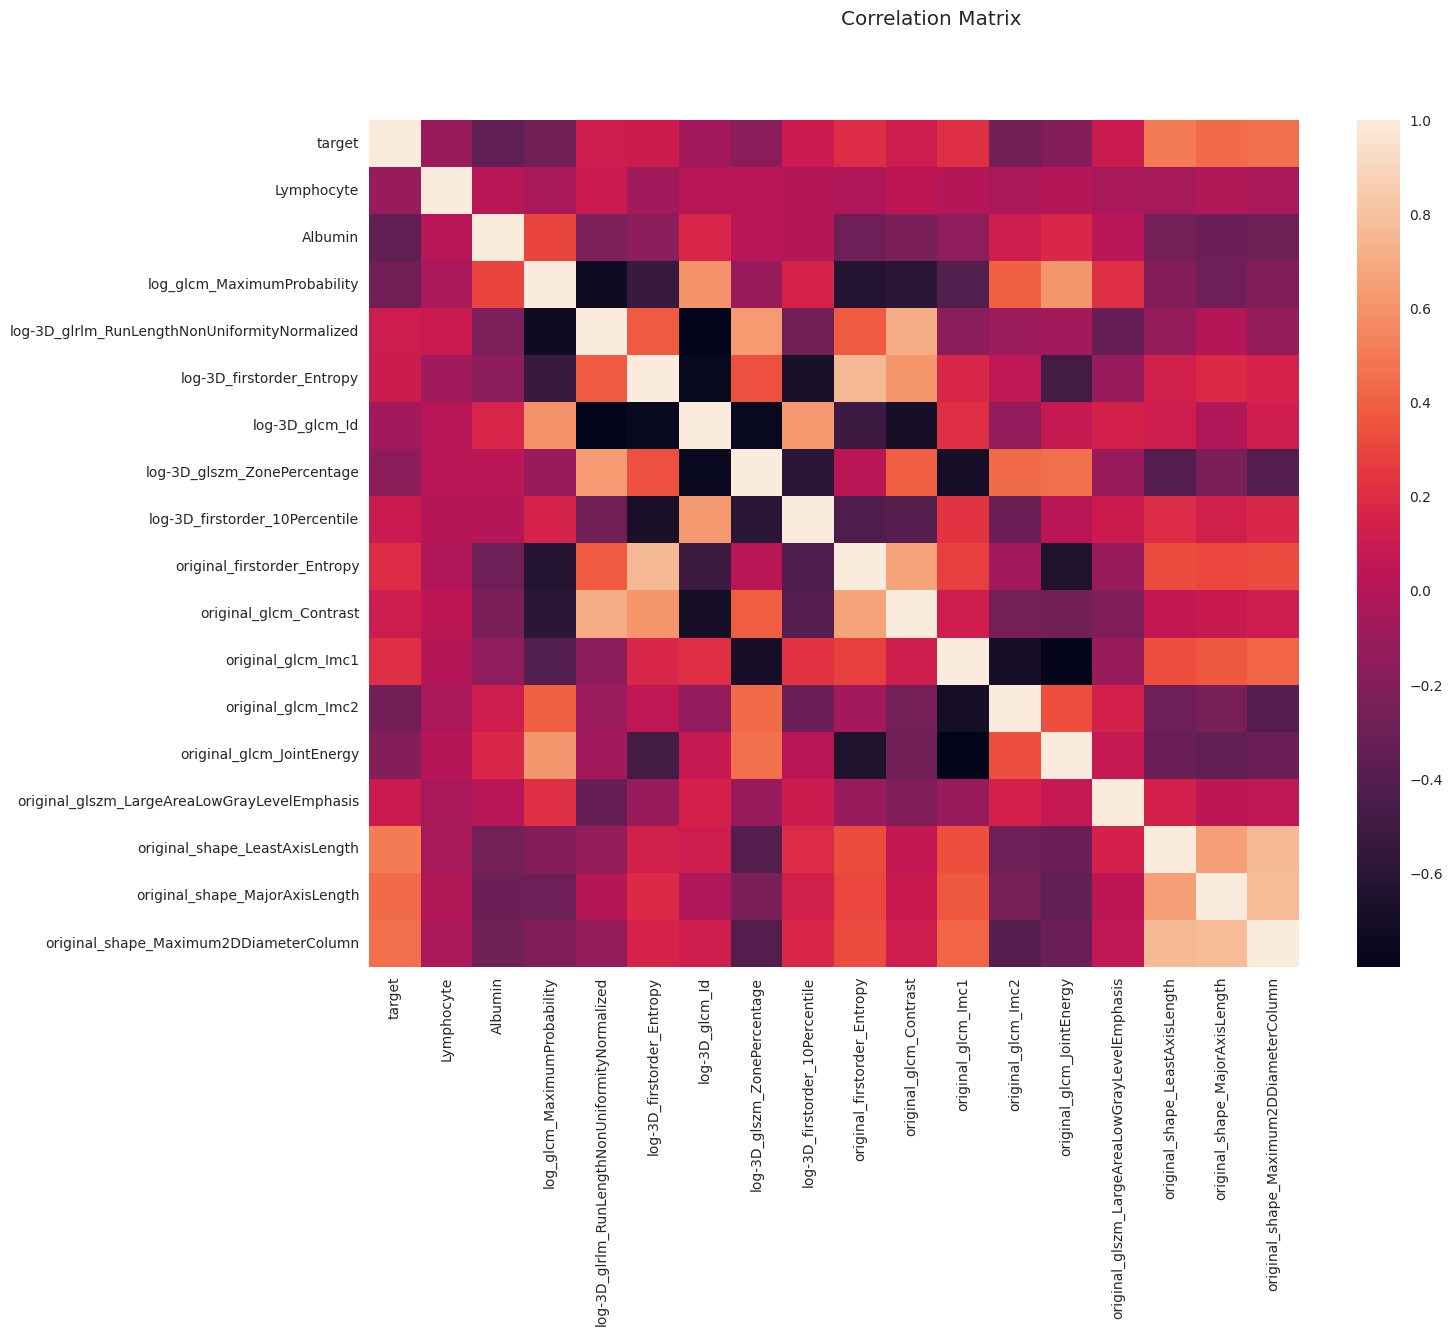

In [31]:
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
corr_matrix=data3.corr()
corr_matrix.to_csv("tmp.csv",encoding="utf_8")
# print(corr_matrix)

mask = np.zeros_like(corr_matrix)
# mask[np.triu_indices_from(mask)] = True

f,ax=plt.subplots(figsize=(15,11))
sns.heatmap(corr_matrix, mask=mask,)
plt.suptitle('Correlation Matrix')
plt.savefig(r'hotmap.png',dpi=600, bbox_inches='tight')
plt.show()

In [3]:
s = setup(data=data,train_size=0.99,test_data=data2, normalize =True,target = 'target', session_id = 123,index=False,log_data=True)

#s = setup(data=data3,train_size=0.7,normalize =True,target = 'target', session_id = 123,index=False,log_data=True)


,Description,Value
0,Session id,123
1,Target,target
2,Target type,Binary
3,Original data shape,"(174, 18)"
4,Transformed data shape,"(174, 18)"
5,Transformed train set shape,"(122, 18)"
6,Transformed test set shape,"(52, 18)"
7,Numeric features,17
8,Preprocess,True
9,Imputation type,simple


In [ ]:
best = compare_models()

In [ ]:
catboost = create_model('catboost')
catboost = predict_model(catboost,raw_score=True)


In [6]:
ada = create_model('ada')
ada1 = predict_model(ada,raw_score=True)
tuned_dt = tune_model(ada,optimize = 'AUC')

ada1.to_csv('ada.csv')


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6154,0.7250,0.4000,0.5000,0.4444,0.1558,0.1581
1,0.5385,0.5250,0.0000,0.0000,0.0000,-0.1471,-0.2282
2,0.6667,0.7812,0.5000,0.5000,0.5000,0.2500,0.2500
3,0.5833,0.6875,0.5000,0.4000,0.4444,0.1176,0.1195
4,0.8333,0.8438,1.0000,0.6667,0.8000,0.6667,0.7071
5,0.7500,0.8438,0.7500,0.6000,0.6667,0.4706,0.4781
6,0.7500,0.7812,0.5000,0.6667,0.5714,0.4000,0.4082
7,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,0.7500,0.8000,0.6000,0.7500,0.6667,0.4706,0.4781


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Ada Boost Classifier,0.8077,0.8947,0.7368,0.7368,0.7368,0.5853,0.5853


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6154,0.7000,0.6000,0.5000,0.5455,0.2169,0.2196
1,0.6923,0.6500,0.2000,1.0000,0.3333,0.2353,0.3651
2,0.7500,0.8438,0.7500,0.6000,0.6667,0.4706,0.4781
3,0.6667,0.6562,0.5000,0.5000,0.5000,0.2500,0.2500
4,0.7500,0.7812,0.7500,0.6000,0.6667,0.4706,0.4781
5,0.7500,0.8438,0.5000,0.6667,0.5714,0.4000,0.4082
6,0.7500,0.9375,0.5000,0.6667,0.5714,0.4000,0.4082
7,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,0.8333,0.8857,0.8000,0.8000,0.8000,0.6571,0.6571


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


AttributeError: 'AdaBoostClassifier' object has no attribute 'to_csv'

In [5]:
ada

AdaBoostClassifier(algorithm='SAMME.R', base_estimator='deprecated',
                   estimator=None, learning_rate=1.0, n_estimators=50,
                   random_state=123)

In [48]:
nb = create_model('nb')
nb = predict_model(nb,raw_score=True)
nb.to_csv('nb.csv')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6154,0.4500,0.4000,0.5000,0.4444,0.1558,0.1581
1,0.6923,0.6750,0.8000,0.5714,0.6667,0.3953,0.4148
2,0.8333,0.9688,1.0000,0.6667,0.8000,0.6667,0.7071
3,0.5833,0.7188,0.5000,0.4000,0.4444,0.1176,0.1195
4,0.5833,0.6562,0.7500,0.4286,0.5455,0.2105,0.2390
5,0.5833,0.5938,0.2500,0.3333,0.2857,0.0000,0.0000
6,0.5833,0.6875,0.5000,0.4000,0.4444,0.1176,0.1195
7,0.9167,1.0000,1.0000,0.8333,0.9091,0.8333,0.8452
8,0.7500,0.8143,0.8000,0.6667,0.7273,0.5000,0.5071


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Naive Bayes,0.7500,0.8086,0.7895,0.6250,0.6977,0.4894,0.4991


In [49]:
lr = create_model('lr')
lr = predict_model(lr,raw_score=True)
lr.to_csv('lr.csv')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7692,0.8000,0.4000,1.0000,0.5714,0.4507,0.5394
1,0.5385,0.6750,0.2000,0.3333,0.2500,-0.0541,-0.0577
2,0.8333,0.9062,1.0000,0.6667,0.8000,0.6667,0.7071
3,0.6667,0.6875,0.5000,0.5000,0.5000,0.2500,0.2500
4,0.5833,0.7188,0.5000,0.4000,0.4444,0.1176,0.1195
5,0.6667,0.5938,0.2500,0.5000,0.3333,0.1429,0.1581
6,0.8333,0.9062,0.7500,0.7500,0.7500,0.6250,0.6250
7,0.6667,0.8571,0.4000,0.6667,0.5000,0.2727,0.2928
8,0.8333,0.8000,0.6000,1.0000,0.7500,0.6364,0.6831


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,0.8462,0.8628,0.6842,0.8667,0.7647,0.6528,0.6628


In [ ]:
models()

In [50]:
xgboost = create_model('xgboost')
xgboost = predict_model(xgboost,raw_score=True)
xgboost.to_csv('xgboost.csv')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6154,0.6250,0.4000,0.5000,0.4444,0.1558,0.1581
1,0.6923,0.7000,0.2000,1.0000,0.3333,0.2353,0.3651
2,0.8333,0.8125,1.0000,0.6667,0.8000,0.6667,0.7071
3,0.6667,0.6250,0.2500,0.5000,0.3333,0.1429,0.1581
4,0.7500,0.7812,1.0000,0.5714,0.7273,0.5263,0.5976
5,0.6667,0.8125,0.5000,0.5000,0.5000,0.2500,0.2500
6,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,0.9167,1.0000,1.0000,0.8333,0.9091,0.8333,0.8452
8,0.8333,0.9714,0.8000,0.8000,0.8000,0.6571,0.6571


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extreme Gradient Boosting,0.8077,0.8628,0.6316,0.8000,0.7059,0.5659,0.5747


In [63]:
rf = create_model('rf')
rf = predict_model(rf,raw_score=True)
rf.to_csv('rf.csv')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6923,0.6750,0.4000,0.6667,0.5000,0.2973,0.3175
1,0.5385,0.7000,0.2000,0.3333,0.2500,-0.0541,-0.0577
2,0.9167,0.9062,1.0000,0.8000,0.8889,0.8235,0.8367
3,0.5833,0.5625,0.2500,0.3333,0.2857,0.0000,0.0000
4,0.6667,0.7500,0.5000,0.5000,0.5000,0.2500,0.2500
5,0.8333,0.8438,0.7500,0.7500,0.7500,0.6250,0.6250
6,0.9167,0.9688,0.7500,1.0000,0.8571,0.8000,0.8165
7,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,0.8333,1.0000,0.6000,1.0000,0.7500,0.6364,0.6831


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.8462,0.8844,0.5789,1.0000,0.7333,0.6357,0.6826


In [39]:
rbfsvm = create_model('rbfsvm')
rbfsvm = predict_model(rbfsvm,raw_score=True)
rbfsvm.to_csv('rbfsvm.csv')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6154,0.6000,0.4000,0.5000,0.4444,0.1558,0.1581
1,0.5385,0.6000,0.4000,0.4000,0.4000,0.0250,0.0250
2,0.8333,0.8750,1.0000,0.6667,0.8000,0.6667,0.7071
3,0.5000,0.5000,0.2500,0.2500,0.2500,-0.1250,-0.1250
4,0.5833,0.7812,0.5000,0.4000,0.4444,0.1176,0.1195
5,0.6667,0.7188,0.2500,0.5000,0.3333,0.1429,0.1581
6,0.8333,0.9688,0.7500,0.7500,0.7500,0.6250,0.6250
7,0.8333,0.9714,0.8000,0.8000,0.8000,0.6571,0.6571
8,0.9167,1.0000,0.8000,1.0000,0.8889,0.8235,0.8367


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,SVM - Radial Kernel,0.7885,0.8612,0.6316,0.7500,0.6857,0.5281,0.5325


In [64]:
knn = create_model('knn')
knn = predict_model(knn,raw_score=True)
knn.to_csv('knn.csv')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6154,0.7125,0.4000,0.5000,0.4444,0.1558,0.1581
1,0.5385,0.5375,0.4000,0.4000,0.4000,0.0250,0.0250
2,0.8333,0.8438,1.0000,0.6667,0.8000,0.6667,0.7071
3,0.6667,0.6719,0.2500,0.5000,0.3333,0.1429,0.1581
4,0.7500,0.8438,0.7500,0.6000,0.6667,0.4706,0.4781
5,0.7500,0.7500,0.7500,0.6000,0.6667,0.4706,0.4781
6,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,0.9167,0.9143,1.0000,0.8333,0.9091,0.8333,0.8452
8,0.9167,0.9286,0.8000,1.0000,0.8889,0.8235,0.8367


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,K Neighbors Classifier,0.7692,0.8158,0.7368,0.6667,0.7000,0.5133,0.5150


In [46]:
models()

,Name,Reference,Turbo
ID,,,
lr,Logistic Regression,sklearn.linear_model._logistic.LogisticRegression,True
knn,K Neighbors Classifier,sklearn.neighbors._classification.KNeighborsCl...,True
nb,Naive Bayes,sklearn.naive_bayes.GaussianNB,True
dt,Decision Tree Classifier,sklearn.tree._classes.DecisionTreeClassifier,True
svm,SVM - Linear Kernel,sklearn.linear_model._stochastic_gradient.SGDC...,True
rbfsvm,SVM - Radial Kernel,sklearn.svm._classes.SVC,False
gpc,Gaussian Process Classifier,sklearn.gaussian_process._gpc.GaussianProcessC...,False
mlp,MLP Classifier,sklearn.neural_network._multilayer_perceptron....,False
ridge,Ridge Classifier,sklearn.linear_model._ridge.RidgeClassifier,True


In [65]:

lightgbm = create_model('lightgbm')
lightgbm = predict_model(lightgbm,raw_score=True)
lightgbm.to_csv('lightgbm.csv')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6154,0.6000,0.4000,0.5000,0.4444,0.1558,0.1581
1,0.7692,0.7000,0.4000,1.0000,0.5714,0.4507,0.5394
2,0.8333,0.8125,1.0000,0.6667,0.8000,0.6667,0.7071
3,0.7500,0.7812,0.5000,0.6667,0.5714,0.4000,0.4082
4,0.5833,0.8125,0.5000,0.4000,0.4444,0.1176,0.1195
5,0.6667,0.8125,0.5000,0.5000,0.5000,0.2500,0.2500
6,0.8333,0.9375,0.7500,0.7500,0.7500,0.6250,0.6250
7,0.9167,0.9714,1.0000,0.8333,0.9091,0.8333,0.8452
8,0.6667,0.8286,0.6000,0.6000,0.6000,0.3143,0.3143


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.6923,0.8230,0.5789,0.5789,0.5789,0.3365,0.3365


In [35]:
rf = create_model('rf')
rf

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6923,0.6750,0.4000,0.6667,0.5000,0.2973,0.3175
1,0.5385,0.7000,0.2000,0.3333,0.2500,-0.0541,-0.0577
2,0.9167,0.9062,1.0000,0.8000,0.8889,0.8235,0.8367
3,0.5833,0.5625,0.2500,0.3333,0.2857,0.0000,0.0000
4,0.6667,0.7500,0.5000,0.5000,0.5000,0.2500,0.2500
5,0.8333,0.8438,0.7500,0.7500,0.7500,0.6250,0.6250
6,0.9167,0.9688,0.7500,1.0000,0.8571,0.8000,0.8165
7,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,0.8333,1.0000,0.6000,1.0000,0.7500,0.6364,0.6831


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=100, n_jobs=-1, oob_score=False,
                       random_state=123, verbose=0, warm_start=False)

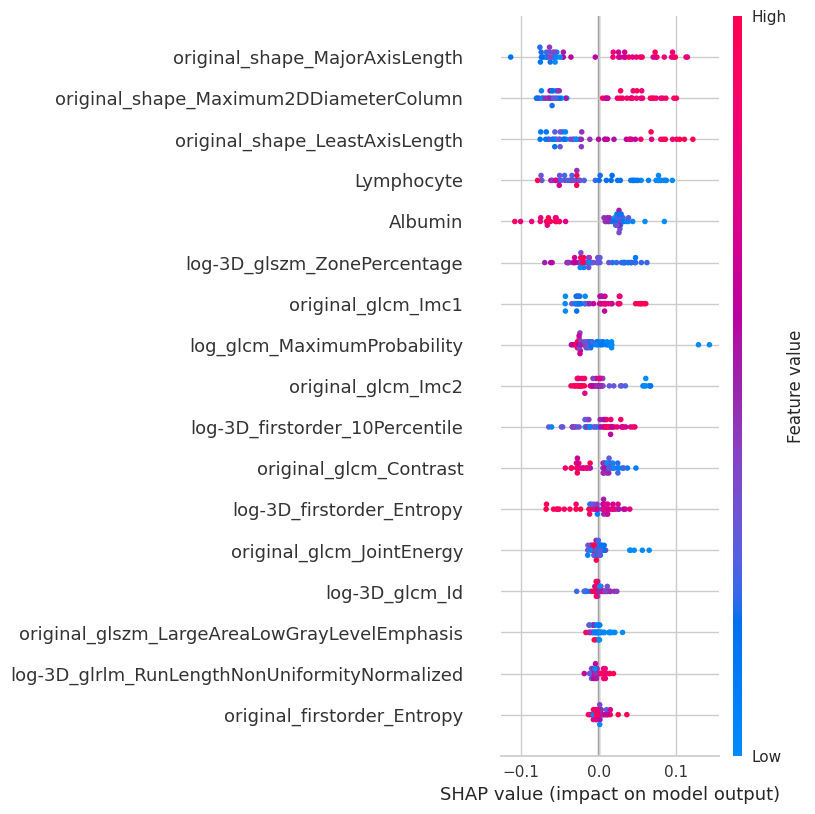

In [36]:

interpret_model(rf,plot = 'summary')

In [44]:
interpret_model(rf,plot='reason')

## 绘制曲线

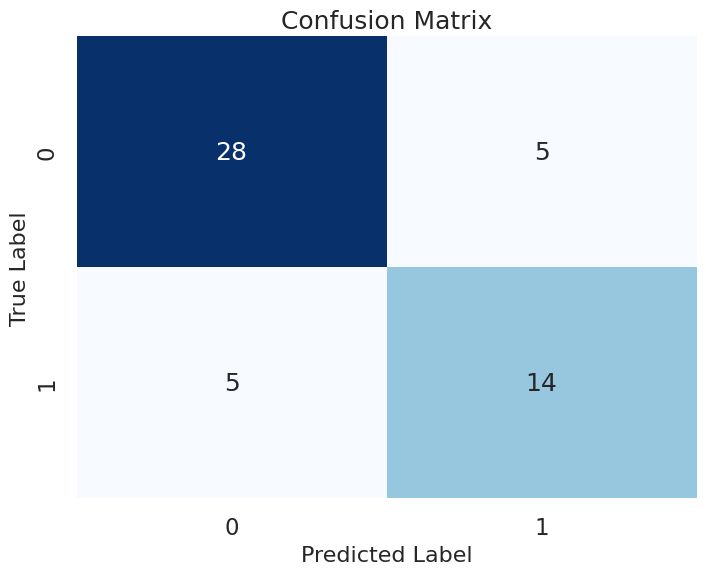

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix
import seaborn as sns
df = pd.read_csv("/kaggle/working/ada.csv")


conf_matrix = confusion_matrix(df['target'], df['prediction_label'])
sns.set(font_scale=1.5)
# 绘制热力图
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label', fontsize=16)  # 设置 x 轴标签字体大小
plt.ylabel('True Label', fontsize=16)  # 设置 y 轴标签字体大小
plt.title('Confusion Matrix', fontsize=18)  # 设置标题字体大小
plt.savefig(r'hx.png',dpi=600)
plt.show()



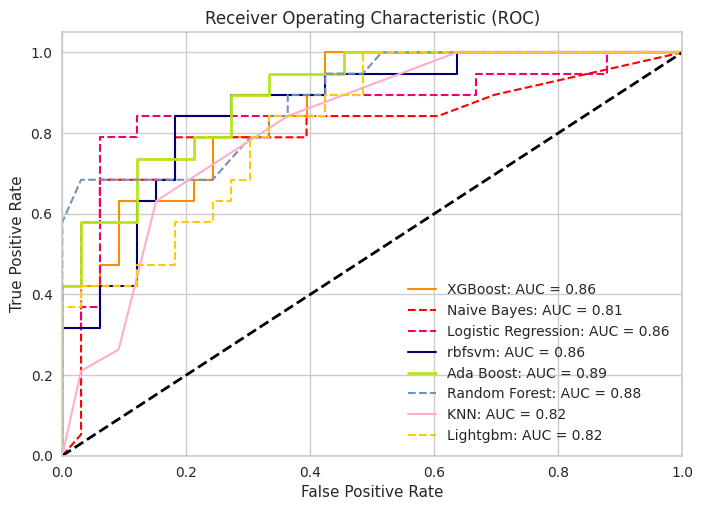

In [71]:

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

df1 = pd.read_csv("/kaggle/working/xgboost.csv")
fpr1, tpr1, thresholds = roc_curve(df1['target'], df1['prediction_score_1'])
roc_auc1 = auc(fpr1, tpr1)


df2 = pd.read_csv("/kaggle/working/nb.csv")
fpr2, tpr2, thresholds = roc_curve(df2['target'], df2['prediction_score_1'])
roc_auc2 = auc(fpr2, tpr2)

df3 = pd.read_csv("/kaggle/working/lr.csv")
fpr3, tpr3, thresholds = roc_curve(df3['target'], df3['prediction_score_1'])
roc_auc3 = auc(fpr3, tpr3)

df4 = pd.read_csv("/kaggle/working/rbfsvm.csv")
fpr4, tpr4, thresholds = roc_curve(df4['target'], df4['prediction_score_1'])
roc_auc4 = auc(fpr4, tpr4)

df5 = pd.read_csv("/kaggle/working/ada.csv")
fpr5, tpr5, thresholds = roc_curve(df5['target'], df5['prediction_score_1'])
roc_auc5 = auc(fpr5, tpr5)

df5 = pd.read_csv("/kaggle/working/ada.csv")
fpr5, tpr5, thresholds = roc_curve(df5['target'], df5['prediction_score_1'])
roc_auc5 = auc(fpr5, tpr5)

df6 = pd.read_csv("/kaggle/working/rf.csv")
fpr6, tpr6, thresholds = roc_curve(df6['target'], df6['prediction_score_1'])
roc_auc6 = auc(fpr6, tpr6)

df7 = pd.read_csv("/kaggle/working/knn.csv")
fpr7, tpr7, thresholds = roc_curve(df7['target'], df7['prediction_score_1'])
roc_auc7 = auc(fpr7, tpr7)

df8 = pd.read_csv("/kaggle/working/lightgbm.csv")
fpr8, tpr8, thresholds = roc_curve(df8['target'], df8['prediction_score_1'])
roc_auc8 = auc(fpr8, tpr8)


# 绘制 ROC 曲线
plt.figure()
plt.plot(fpr1, tpr1, color='darkorange', lw=1.5, label='XGBoost: AUC = %0.2f' % roc_auc1)
plt.plot(fpr2, tpr2, color='red', lw=1.5, linestyle='--',label='Naive Bayes: AUC = %0.2f' % roc_auc2)
plt.plot(fpr3, tpr3, color='#f0006e', linestyle='--',lw=1.5, label='Logistic Regression: AUC = %0.2f' % roc_auc3)
plt.plot(fpr4, tpr4, color='#000073', lw=1.5, label='rbfsvm: AUC = %0.2f' % roc_auc4)
plt.plot(fpr5, tpr5, color='#b5e61d', lw=2, label='Ada Boost: AUC = %0.2f' % roc_auc5)
plt.plot(fpr6, tpr6, color='#7092be', lw=1.5, linestyle='--',label='Random Forest: AUC = %0.2f' % roc_auc6)
plt.plot(fpr7, tpr7, color='#ffaec9', lw=1.5,label='KNN: AUC = %0.2f' % roc_auc7)
plt.plot(fpr8, tpr8, color='#ffc90e', lw=1.5, linestyle='--',label='Lightgbm: AUC = %0.2f' % roc_auc8)


plt.plot([0, 1], [0, 1], color='black', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")

plt.savefig(r'ROC.png',dpi=600)
plt.show()



## 自己建立模型

In [6]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, recall_score, precision_score, f1_score
from sklearn.model_selection import train_test_split

In [7]:
X_train = data.drop(columns=['target'])
y_train = data['target']
X_test = data2.drop(columns=['target'])
y_test = data2['target']

In [8]:
model = RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, criterion='gini', max_depth=None, 
                               max_features='sqrt', max_leaf_nodes=None, max_samples=None, 
                               min_impurity_decrease=0.0, min_samples_leaf=1, min_samples_split=2, 
                               min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1, 
                               oob_score=False, random_state=123, verbose=0, warm_start=False)
model.fit(X_train, y_train)

# 在测试集上进行预测
y_pred = model.predict(X_test)

In [26]:
# X = data3.drop(columns=['target'], inplace=True)
data3

,Lymphocyte,Albumin,log_glcm_MaximumProbability,log-3D_glrlm_RunLengthNonUniformityNormalized,log-3D_firstorder_Entropy,log-3D_glcm_Id,log-3D_glszm_ZonePercentage,log-3D_firstorder_10Percentile,original_firstorder_Entropy,original_glcm_Contrast,original_glcm_Imc1,original_glcm_Imc2,original_glcm_JointEnergy,original_glszm_LargeAreaLowGrayLevelEmphasis,original_shape_LeastAxisLength,original_shape_MajorAxisLength,original_shape_Maximum2DDiameterColumn
0,12.60,32.5,-0.704947,0.879467,-0.936085,0.325057,0.074001,-0.232792,0.420313,1.003225,0.373202,-0.299315,-0.408447,-0.090322,-0.189676,1.393978,0.751612
1,0.50,33.4,1.524320,-1.659591,-1.254441,2.076787,-1.118386,0.617560,-0.042386,-0.958945,0.072097,0.262759,-0.080922,-0.080458,0.131122,-0.317276,0.565193
2,1.31,46.1,0.067440,0.054602,0.922559,-0.546110,0.456618,-0.455927,0.624808,0.306232,0.025952,0.507243,-0.346679,-0.089981,-0.866867,1.877085,0.678922
3,4.13,27.6,-0.433933,0.227635,-0.128500,0.198842,-0.374070,0.444471,-0.321890,0.327892,0.527854,-0.943339,-0.069447,-0.086475,0.963736,0.062966,0.499397
4,0.59,34.0,-0.837453,0.443650,-0.286034,0.163295,-0.746481,0.370874,0.686665,0.690070,0.583553,-1.101635,-0.518835,-0.090859,-0.142428,-0.828761,-0.777050
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169,15.17,28.7,-0.949208,0.747214,0.314113,-0.373791,-0.476537,0.207404,0.738245,0.551380,0.550384,-0.867180,-0.501151,-0.090757,1.631956,1.153633,1.086051
170,1.54,35.8,-0.639225,0.352332,-0.260448,0.116058,-0.395494,0.178384,0.078703,0.088312,0.647561,-1.353800,-0.352460,-0.090652,0.829015,-0.300989,0.553308
171,0.30,35.0,0.918962,-0.954076,0.427230,0.038632,-0.162977,-0.175264,0.147123,-0.822079,-0.312104,0.962011,0.094387,-0.069601,1.559272,1.197742,0.602225
172,0.70,34.4,-0.553161,0.163044,0.215225,0.006640,-0.450468,0.791848,0.047085,-0.103921,0.532387,-1.017453,-0.327878,-0.089896,1.500159,0.882914,0.927420


In [27]:
import shap


explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(data3)

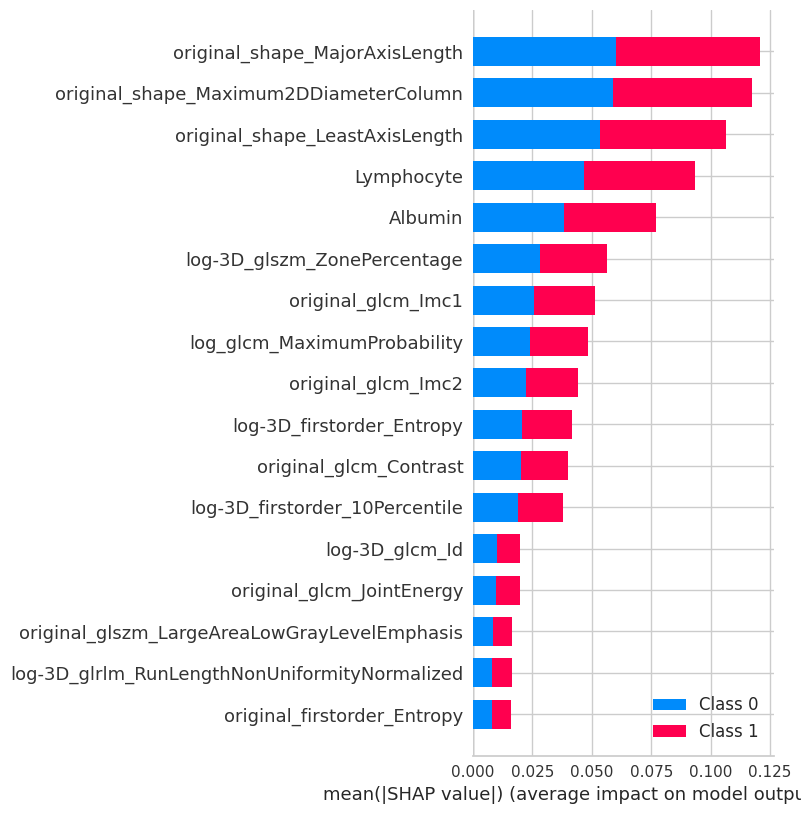

In [28]:
shap.summary_plot(shap_values, data3)

In [84]:
auc = roc_auc_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# 打印各项指标
print("AUC:", auc)
print("Accuracy:", accuracy)
print("Recall:", recall)
print("Precision:", precision)
print("F1 Score:", f1)

AUC: 0.7894736842105263
Accuracy: 0.8461538461538461
Recall: 0.5789473684210527
Precision: 1.0
F1 Score: 0.7333333333333334
